In [8]:
%load_ext autoreload
%autoreload 2
%pip install --upgrade pip
%pip install matplotlib
%pip install torchvision
%pip install torch
%pip install keras
%pip install tensorflow

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [9]:
"""Kyrylo Boiko Lab 5"""

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dropout
import os
import matplotlib.pyplot as plt

In [10]:
"""Kyrylo Boiko Lab 5"""

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 20)  
        self.fc2 = nn.Linear(20, 10) 
    def forward(self, x):
        x = x.view(-1, 28 * 28)  
        x = F.relu(self.fc1(x)) 
        x = self.fc2(x)  
        return x

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


model = SimpleNN()
criterion = nn.CrossEntropyLoss()  
optimizer = optim.SGD(model.parameters(), lr=0.01)  


n_epochs = 8
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []


In [11]:
"""Kyrylo Boiko Lab 5"""

for epoch in range(n_epochs):
    running_loss = 0
    correct_train = 0
    total_train = 0
    
    model.train()
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
  
    model.eval()
    test_loss = 0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    
    test_loss = test_loss / len(testloader)
    test_accuracy = 100 * correct_test / total_test
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f'Epoch {epoch + 1}/{n_epochs}, Train Loss: {train_loss}, Test Loss: {test_loss}, '
          f'Train Accuracy: {train_accuracy}%, Test Accuracy: {test_accuracy}%')


Epoch 1/8, Train Loss: 0.8461320512552759, Test Loss: 0.4181170122353894, Train Accuracy: 77.375%, Test Accuracy: 88.4%
Epoch 2/8, Train Loss: 0.3895005993147903, Test Loss: 0.34832221053683077, Train Accuracy: 88.97666666666667%, Test Accuracy: 89.87%
Epoch 3/8, Train Loss: 0.33771487884620616, Test Loss: 0.3152957464669161, Train Accuracy: 90.39666666666666%, Test Accuracy: 90.89%
Epoch 4/8, Train Loss: 0.3141767495015918, Test Loss: 0.29699141517945915, Train Accuracy: 90.96333333333334%, Test Accuracy: 91.13%
Epoch 5/8, Train Loss: 0.29825704062639524, Test Loss: 0.2902484681386097, Train Accuracy: 91.42666666666666%, Test Accuracy: 91.47%
Epoch 6/8, Train Loss: 0.2867947512709383, Test Loss: 0.2736098529937066, Train Accuracy: 91.78166666666667%, Test Accuracy: 92.11%
Epoch 7/8, Train Loss: 0.2762191625300056, Test Loss: 0.26516094760506587, Train Accuracy: 92.0%, Test Accuracy: 92.41%
Epoch 8/8, Train Loss: 0.2666414857411118, Test Loss: 0.2599461720069977, Train Accuracy: 92.345

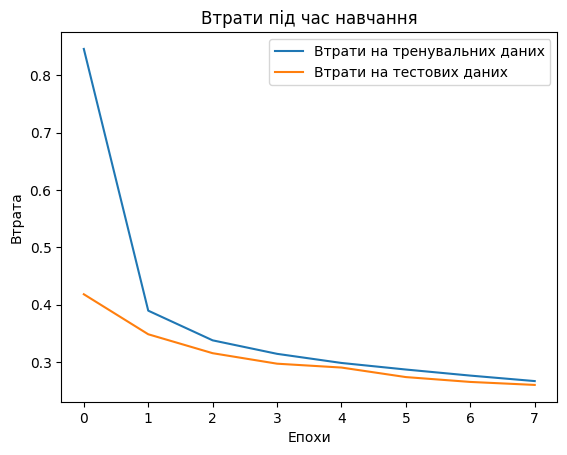

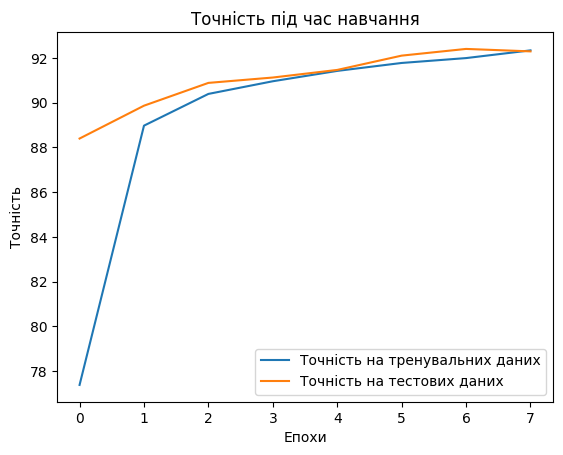

In [12]:
"""Kyrylo Boiko Lab 5"""

plt.plot(train_losses, label='Втрати на тренувальних даних')
plt.plot(test_losses, label='Втрати на тестових даних')
plt.title('Втрати під час навчання')
plt.xlabel('Епохи')
plt.ylabel('Втрата')
plt.legend()
plt.show()

plt.plot(train_accuracies, label='Точність на тренувальних даних')
plt.plot(test_accuracies, label='Точність на тестових даних')
plt.title('Точність під час навчання')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()

In [13]:
"""Kyrylo Boiko Lab 5"""

os.environ["KERAS_BACKEND"] = "torch"
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

model = Sequential([
 Flatten(input_shape=(28, 28)),
 Dense(256, activation='relu'),
 Dense(128, activation='relu'),
 Dropout(0.5),
 Dense(64, activation='relu'),
 Dropout(0.3),
 Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  


history = model.fit(train_images, train_labels, batch_size = 32, epochs=8, validation_split=0.2)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)


Epoch 1/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7750 - loss: 0.7041 - val_accuracy: 0.9584 - val_loss: 0.1431
Epoch 2/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9500 - loss: 0.1849 - val_accuracy: 0.9662 - val_loss: 0.1168
Epoch 3/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9653 - loss: 0.1260 - val_accuracy: 0.9675 - val_loss: 0.1153
Epoch 4/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9736 - loss: 0.0948 - val_accuracy: 0.9682 - val_loss: 0.1128
Epoch 5/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9757 - loss: 0.0870 - val_accuracy: 0.9722 - val_loss: 0.1072
Epoch 6/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9806 - loss: 0.0668 - val_accuracy: 0.9722 - val_loss: 0.1030
Epoch 7/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9829 - loss: 0.0586 - val_accuracy: 0.9748 - val_loss: 0.1066
Epoch 8/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9836 - loss: 0.0559 - val_acc

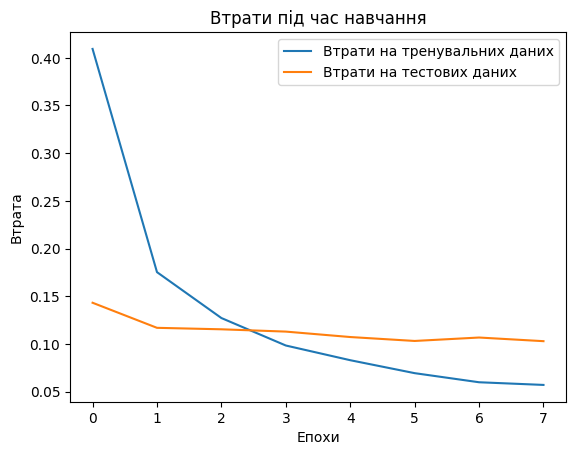

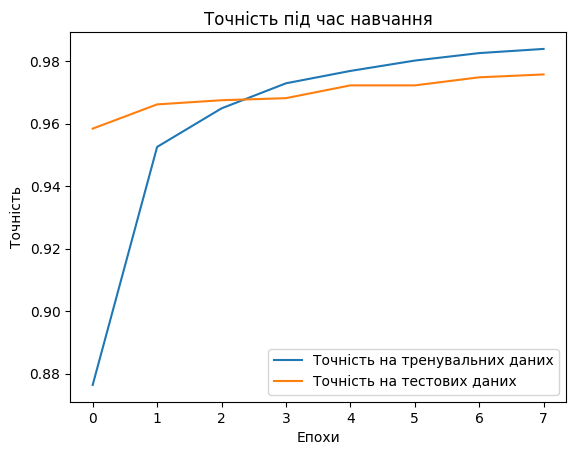

In [14]:
"""Kyrylo Boiko Lab 5"""

plt.plot(history.history['loss'], label='Втрати на тренувальних даних')
plt.plot(history.history['val_loss'], label='Втрати на тестових даних')
plt.title('Втрати під час навчання')
plt.xlabel('Епохи')
plt.ylabel('Втрата')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Точність на тренувальних даних')
plt.plot(history.history['val_accuracy'], label='Точність на тестових даних')
plt.title('Точність під час навчання')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


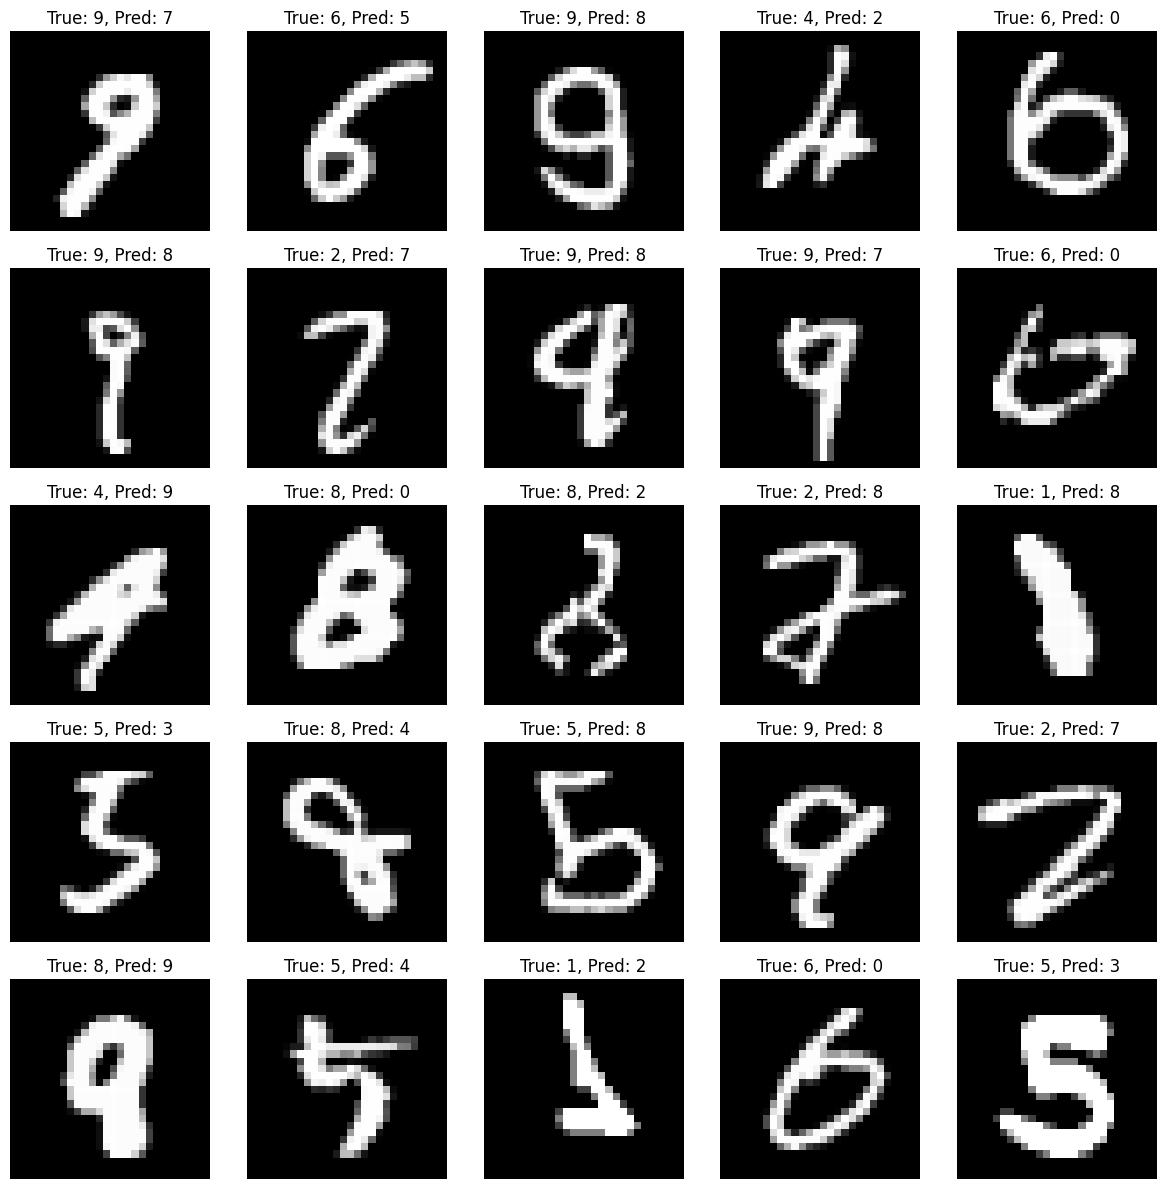

In [15]:
"""Kyrylo Boiko Lab 5"""

predictions = model.predict(test_images)
predicted_classes = predictions.argmax(axis=1)

misclassified_images_keras = []
misclassified_labels_keras = []
predicted_labels_keras = []


for i in range(len(test_labels)):
    if predicted_classes[i] != test_labels[i]:
        misclassified_images_keras.append(test_images[i])
        misclassified_labels_keras.append(test_labels[i])
        predicted_labels_keras.append(predicted_classes[i])


plt.figure(figsize=(12, 12))
for i in range(min(25, len(misclassified_images_keras))):  
    plt.subplot(5, 5, i + 1)
    plt.imshow(misclassified_images_keras[i], cmap='gray')
    plt.title(f'True: {misclassified_labels_keras[i]}, Pred: {predicted_labels_keras[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()
